# Imports

In [1]:
import time
import os
import json
from tqdm import tqdm
import numpy as np
import pickle

import Noise
from Noise import *
from data_viz import *
from clustering_and_reconstruction import *
from Second_method import *

# Path definition

In [2]:
dir_joints = 'Joints_semidef'
dir_im = 'Immagini_semidef'

save_path = os.path.join(os.getcwd(), 'best_worst_cases')
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Noise

### Loading poses

In [3]:
start = time.time()

dict_joints = {}
dict_joints_SR_destrorso = {}
for posa in tqdm(os.listdir(dir_im)):
  posa1 = posa[:-13]
  posa = posa1 + "_keypoints.json"
  try:
    file = dir_joints+'/'+posa
    if os.path.isfile(file):
      with open(file) as f:
        data = json.load(f)
      prova = data['people'][0]['pose_keypoints_2d']
      punti = []
      punti1 = []
      i = 0
      max_y = 0.0
      while i < 75:
        x = prova[i]
        y1 = prova[i+1]
        y2 = -prova[i+1]
        punto = [x,y1]
        punto1 = [x,y2]
        punti.append(punto)
        punti1.append(punto1)
        i += 3
        if np.abs(y1)> max_y:
            max_y = np.abs(y1)
      punti = punti[:15]
      punti1 = punti1[:15]
      for i in range(len(punti1)):
        punti1[i][1] += max_y

      dict_joints[posa1] = punti
      dict_joints_SR_destrorso[posa1] = punti1
  except:
    print(posa)
end = time.time()
print(end-start)
print(len(dict_joints))

100%|██████████████████████████████████████████████████████████████████████████████| 618/618 [00:00<00:00, 2671.30it/s]

0.24035859107971191
618


### Noise analysis

#### Uploading results for noise analysis

In [4]:
best_worst_cases = {}
with open (os.path.join(save_path, 'best_worst_cases_1.txt'), 'rb') as fp:
  best_worst_cases = pickle.load(fp)

In [5]:
pose_id = 84 # Insert pose id
pose_name = list(dict_joints_SR_destrorso.keys())[pose_id]

N = Noises(dict_joints_SR_destrorso, pose_name, method = 1)
N.sigma_range = np.logspace(-3, 0, 100)
losses_sigma = N.calc_losses_sigma()
position, num_position = N.print_position()

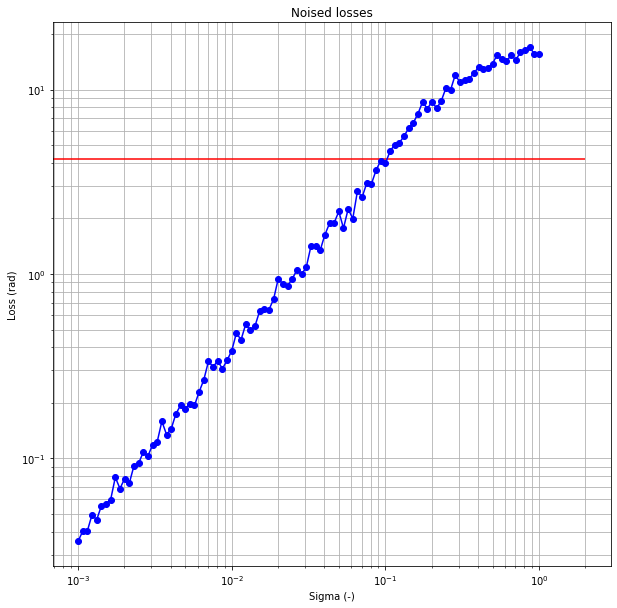

In [6]:
bwc = best_worst_cases[pose_id][0][3][1]
sigma_range = np.logspace(-3,0,100)
graph_losses(losses_sigma, bwc, sigma_range)

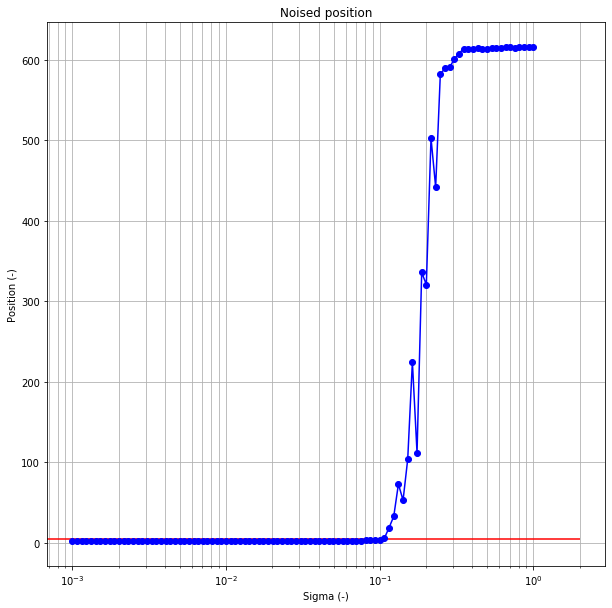

In [7]:
max_position = 5
sigma_range = np.logspace(-3,0,100)
graph_position(num_position, max_position, sigma_range)

### Visualize the noisy pose

1544scala_rendered.png


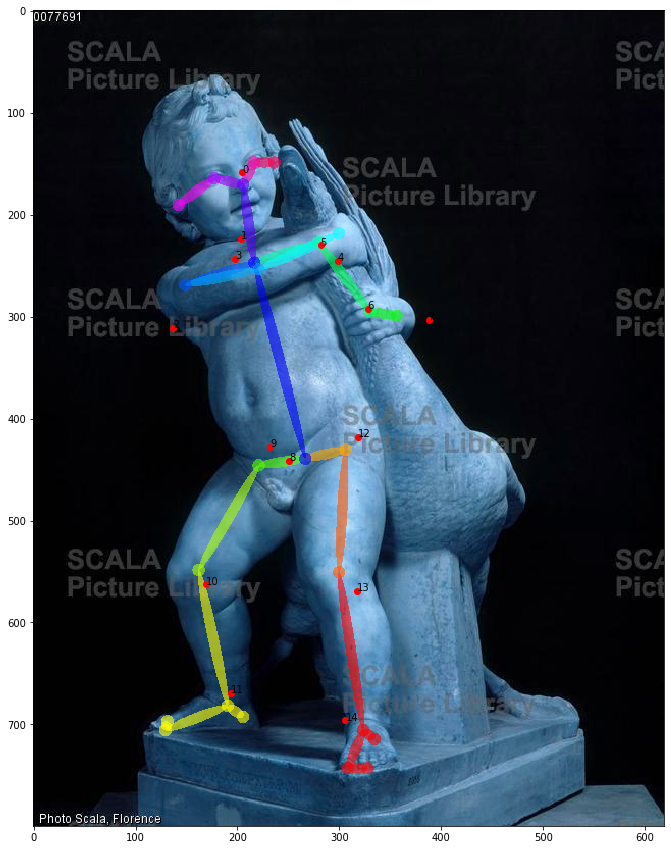

In [8]:
N = Noises(dict_joints, pose_name, method = 1)
noised_pose = N.make_noised_poses(sigma = 0.1)[3]
show_single_pose(pose_id, noised_pose, dict_joints, dir_im)

# Reconstruction error

In [9]:
n_clusters = 9 #insert the number of desired clusters

In [18]:
MRE, list_errors = mean_reconstruction_error(n_clusters, dict_joints_SR_destrorso)

Mean reconstruction error = 2.534330070590284°
